In [25]:
import numpy as np
import pandas as pd

In [26]:
train=pd.read_csv('train.tsv',delimiter='\t')
test=pd.read_csv('test.tsv',delimiter='\t')

In [27]:
df=train.append(test).reset_index(drop=True)

In [28]:
df.head()

,acceleration,car name,cylinders,displacement,horsepower,id,model year,mpg,origin,weight
0,16.0,dodge aries se,4,135.0,84.00,0,82,29.0,1,2525.0
1,14.0,vw rabbit custom,4,89.0,71.00,3,79,31.9,2,1925.0
2,15.5,toyota mark ii,6,156.0,108.0,9,76,19.0,3,2930.0
3,14.5,dodge colt,4,90.0,75.00,11,74,28.0,1,2125.0
4,17.3,toyota tercel,4,89.0,62.00,13,81,37.7,3,2050.0


In [29]:
def split_name(text,num):
    split=text.split()
    try:
        return split[num]
    except:
        return np.nan

In [30]:
df['car0']=df['car name'].apply(lambda x:split_name(text=x,num=0))

In [31]:
df['car1']=df['car name'].apply(lambda x:split_name(text=x,num=1))
df['car2']=df['car name'].apply(lambda x:split_name(text=x,num=2))

In [32]:
df.head()

,acceleration,car name,cylinders,displacement,horsepower,id,model year,mpg,origin,weight,car0,car1,car2
0,16.0,dodge aries se,4,135.0,84.00,0,82,29.0,1,2525.0,dodge,aries,se
1,14.0,vw rabbit custom,4,89.0,71.00,3,79,31.9,2,1925.0,vw,rabbit,custom
2,15.5,toyota mark ii,6,156.0,108.0,9,76,19.0,3,2930.0,toyota,mark,ii
3,14.5,dodge colt,4,90.0,75.00,11,74,28.0,1,2125.0,dodge,colt,NaN
4,17.3,toyota tercel,4,89.0,62.00,13,81,37.7,3,2050.0,toyota,tercel,NaN


In [33]:
car1_notnull=df['car1'].notnull()
car2_notnull=df['car2'].notnull()

In [34]:
df['car0_1']=df['car0'][car1_notnull]+df['car1'][car1_notnull]

In [35]:
df['car0_1_2']=df['car0'][car2_notnull]+df['car1'][car2_notnull]+df['car2'][car2_notnull]

In [36]:
df.head()

,acceleration,car name,cylinders,displacement,horsepower,id,model year,mpg,origin,weight,car0,car1,car2,car0_1,car0_1_2
0,16.0,dodge aries se,4,135.0,84.00,0,82,29.0,1,2525.0,dodge,aries,se,dodgearies,dodgeariesse
1,14.0,vw rabbit custom,4,89.0,71.00,3,79,31.9,2,1925.0,vw,rabbit,custom,vwrabbit,vwrabbitcustom
2,15.5,toyota mark ii,6,156.0,108.0,9,76,19.0,3,2930.0,toyota,mark,ii,toyotamark,toyotamarkii
3,14.5,dodge colt,4,90.0,75.00,11,74,28.0,1,2125.0,dodge,colt,NaN,dodgecolt,NaN
4,17.3,toyota tercel,4,89.0,62.00,13,81,37.7,3,2050.0,toyota,tercel,NaN,toyotatercel,NaN


In [37]:
df.drop(columns='car name',inplace=True)

In [38]:
df['horsepower']=df['horsepower'].replace('?',np.nan)
df['horsepower']=df['horsepower'].astype(np.float64)

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [42]:
pd.get_dummies(df)

,acceleration,cylinders,displacement,horsepower,id,model year,mpg,origin,weight,car0_amc,...,car0_1_2_volkswagen411(sw),car0_1_2_volkswagenmodel111,car0_1_2_volkswagenrabbitcustom,car0_1_2_volkswagenrabbitl,car0_1_2_volkswagensuperbeetle,car0_1_2_volkswagentype3,car0_1_2_volvo145e(sw),car0_1_2_vwdasher(diesel),car0_1_2_vwrabbitc,car0_1_2_vwrabbitcustom
0,16.0,4,135.0,84.0,0,82,29.0,1,2525.0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.0,4,89.0,71.0,3,79,31.9,2,1925.0,0,...,0,0,0,0,0,0,0,0,0,1
2,15.5,6,156.0,108.0,9,76,19.0,3,2930.0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.5,4,90.0,75.0,11,74,28.0,1,2125.0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.3,4,89.0,62.0,13,81,37.7,3,2050.0,0,...,0,0,0,0,0,0,0,0,0,0
5,18.0,4,151.0,90.0,16,82,27.0,1,2735.0,0,...,0,0,0,0,0,0,0,0,0,0
6,18.5,6,250.0,105.0,18,75,16.0,1,3897.0,0,...,0,0,0,0,0,0,0,0,0,0
7,11.0,8,350.0,180.0,19,73,11.0,1,3664.0,0,...,0,0,0,0,0,0,0,0,0,0
8,12.5,4,121.0,113.0,23,70,26.0,2,2234.0,0,...,0,0,0,0,0,0,0,0,0,0
9,15.2,8,318.0,135.0,24,79,18.2,1,3830.0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
pd.options.display.max_columns=999

In [46]:
df=pd.get_dummies(df)

In [47]:
train_df=df[df['mpg'].notnull()]
test_df=df[df['mpg'].isnull()]

In [48]:
feats=[f for f in train_df.columns if f not in ['id','mpg']]

In [49]:
train_X=train_df[feats]
train_y=train_df['mpg']

In [51]:
!pip install lightgbm

In [52]:
import lightgbm as lgb
from sklearn.model_selection import KFold

In [53]:
folds=KFold(n_splits=10,shuffle=True,random_state=0)

In [60]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')

In [61]:
from sklearn.metrics import mean_absolute_error
score=np.empty(10)
feature_importance_df = pd.DataFrame()
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats],train_df['mpg'])):
    train_X,train_y=train_df[feats].iloc[train_idx],train_df['mpg'].iloc[train_idx]
    valid_X,valid_y=train_df[feats].iloc[valid_idx],train_df['mpg'].iloc[valid_idx]
    
    gbm_reg=lgb.LGBMRegressor(objective='regression',
                         num_leaves=31,
                         n_estimators=100)
    gbm_reg.fit(train_X,train_y,
               verbose=0)
    pred_y=gbm_reg.predict(valid_X)
    score[n_fold]=mean_absolute_error(pred_y,valid_y)
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = gbm_reg.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
score.mean()

2.2973257676885757

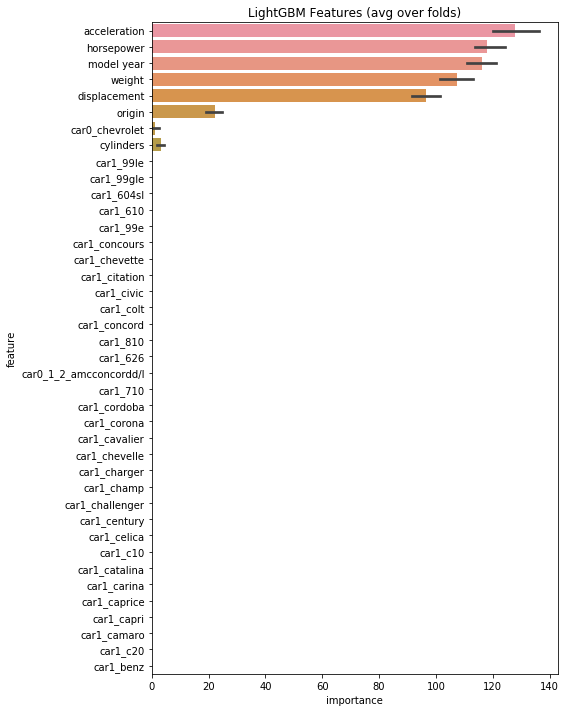

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
display_importances(feature_importance_df)

In [64]:
train_df=df[df['mpg'].notnull()]
test_df=df[df['mpg'].isnull()]

feats=[f for f in train_df.columns if f not in ['id','mpg']]
train_X=train_df[feats]
train_y=train_df['mpg']

train_X,train_y=train_df[feats],train_df['mpg']
test_X=test_df[feats]
gbm_reg=lgb.LGBMRegressor(objective='regression',
                     num_leaves=31,
                     n_estimators=100)
gbm_reg.fit(train_X,train_y,
           verbose=0)
pred_sub=gbm_reg.predict(test_X)

In [65]:
sub=pd.DataFrame(test['id'])
sub['mpg']=pred_sub
sub.to_csv('car_name.csv',header=False,index=False)